# Create a single table from all tables

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

***
### FSP maps table

In [3]:
iso = ['BGD','IND','KEN','LSO','NGA','TZA','UGA']

In [12]:
# Bangladesh
df_bga = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps_bgd.csv')
# India
df_ind = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps_ind.csv')
# Kenya
df_ken = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps_ken.csv')
# Lesotho
df_lso = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps_lso.csv')
# Nigeria
df_nga = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps_nga.csv')
# Tanzania
df_tza = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps_tza.csv')
# Uganda
df_uga = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps_uga.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df = pd.DataFrame(columns=['sector','type','land_use','iso','country','lat','lng','year','name'])
df = pd.concat([df,df_bga,df_ind,df_ken,df_lso,df_nga,df_tza,df_uga])

**Add id column**

In [14]:
df.reset_index(drop=True, inplace=True)
df['id'] = np.arange(len(df))
df = df[['id', 'sector', 'type', 'land_use', 'iso', 'country', 'lat', 'lng', 'year', 'name']]
df.head()

,id,sector,type,land_use,iso,country,lat,lng,year,name
0,0,Finance,Bank Branches,Urban,BGD,Bangladesh,23.71567,90.39706,2013,NaN
1,1,Finance,Bank Branches,Rural,BGD,Bangladesh,25.03466,91.66398,2013,NaN
2,2,Finance,Bank Branches,Rural,BGD,Bangladesh,24.71598,89.08773,2013,NaN
3,3,Finance,Bank Branches,Rural,BGD,Bangladesh,25.12515,88.59117,2013,NaN
4,4,Finance,Bank Branches,Rural,BGD,Bangladesh,23.48638,91.00529,2013,NaN


**Add color column**

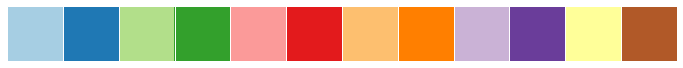

In [57]:
sns.palplot(sns.color_palette("Paired", 12))

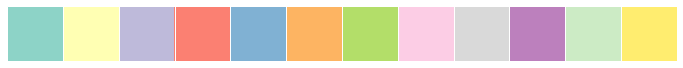

In [58]:
sns.palplot(sns.color_palette("Set3", 12))

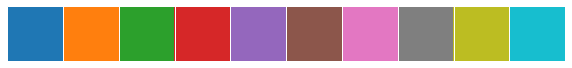

In [59]:
sns.palplot(sns.color_palette("tab10", 10))

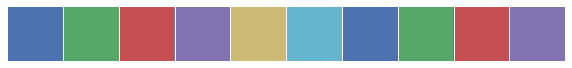

In [60]:
sns.palplot(sns.color_palette("deep", 10))

In [61]:
pal = sns.color_palette("tab10", 10).as_hex()
pal = pal + sns.color_palette("Set3", 12).as_hex()
pal = pal + sns.color_palette("Paired", 12).as_hex()
pal = pal + sns.color_palette("deep", 10).as_hex()

In [62]:
df_color = pd.DataFrame(columns = ['iso', 'type', 'color'])
for country in iso:
    type = df[df['iso'] == country]['type'].unique()
    color = pal[0:len(df[df['iso'] == country]['type'].unique())]
    df_color_iso = pd.DataFrame.from_dict({'iso': country, 'type': type, 'color': color})
    df_color_iso = df_color_iso[['iso', 'type', 'color']]
    df_color = pd.concat([df_color,df_color_iso])
    
df_color.head()

,iso,type,color
0,BGD,Bank Branches,#1f77b4
1,BGD,MFIs,#ff7f0e
2,BGD,Mobile Money Agent,#2ca02c
3,BGD,Offsite ATMs,#d62728
4,BGD,Post Offices,#9467bd


In [63]:
df = pd.merge(df, df_color, how='left', on=['iso', 'type'])
df.head()

,id,sector,type,land_use,iso,country,lat,lng,year,name,color
0,0,Finance,Bank Branches,Urban,BGD,Bangladesh,23.71567,90.39706,2013,NaN,#1f77b4
1,1,Finance,Bank Branches,Rural,BGD,Bangladesh,25.03466,91.66398,2013,NaN,#1f77b4
2,2,Finance,Bank Branches,Rural,BGD,Bangladesh,24.71598,89.08773,2013,NaN,#1f77b4
3,3,Finance,Bank Branches,Rural,BGD,Bangladesh,25.12515,88.59117,2013,NaN,#1f77b4
4,4,Finance,Bank Branches,Rural,BGD,Bangladesh,23.48638,91.00529,2013,NaN,#1f77b4


**Add type_id column**

We add an id to each type in every country and sector

In [64]:
df_type = pd.DataFrame(columns = ['iso', 'type'])
for country in iso:
    type = df[df['iso'] == country]['type'].unique()
    df_type_iso = pd.DataFrame.from_dict({'iso': country, 'type': type})
    df_type_iso = df_type_iso[['iso', 'type',]]
    df_type = pd.concat([df_type,df_type_iso])
    
df_type['type_id'] = np.arange(len(df_type))+1

In [65]:
df = pd.merge(df, df_type, how='left', on=['iso', 'type'])
df.head()

,id,sector,type,land_use,iso,country,lat,lng,year,name,color,type_id
0,0,Finance,Bank Branches,Urban,BGD,Bangladesh,23.71567,90.39706,2013,NaN,#1f77b4,1
1,1,Finance,Bank Branches,Rural,BGD,Bangladesh,25.03466,91.66398,2013,NaN,#1f77b4,1
2,2,Finance,Bank Branches,Rural,BGD,Bangladesh,24.71598,89.08773,2013,NaN,#1f77b4,1
3,3,Finance,Bank Branches,Rural,BGD,Bangladesh,25.12515,88.59117,2013,NaN,#1f77b4,1
4,4,Finance,Bank Branches,Rural,BGD,Bangladesh,23.48638,91.00529,2013,NaN,#1f77b4,1


**Save table**

In [67]:
df.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_maps.csv')

***
### FSP maps voronoids table

In [4]:
# Bangladesh
df_bga = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid_bgd.csv')
# India
df_ind = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid_ind.csv')
# Kenya
df_ken = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid_ken.csv')
# Lesotho
df_lso = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid_lso.csv')
# Nigeria
df_nga = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid_nga.csv')
# Tanzania
df_tza = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid_tza.csv')
# Uganda
df_uga = pd.read_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid_uga.csv')

In [5]:
df_uga.head()

,Unnamed: 0,geometry,iso,sector,type,type_id
0,0,POLYGON ((30.49857792933488 -0.533359079692598...,UGA,Agriculture,Abattoirs/ Slaughter slabs,111
1,1,"POLYGON ((31.42444696769319 2.073476325969033,...",UGA,Agriculture,Abattoirs/ Slaughter slabs,111
2,2,POLYGON ((31.21505696497972 0.6726325542171394...,UGA,Agriculture,Abattoirs/ Slaughter slabs,111
3,3,"POLYGON ((31.6970426 0.4467926000000025, 31.69...",UGA,Agriculture,Abattoirs/ Slaughter slabs,111
4,4,"POLYGON ((30.90483515131127 2.798342830898457,...",UGA,Agriculture,Abattoirs/ Slaughter slabs,111


In [8]:
df_vor = pd.DataFrame(columns=['geometry','iso','sector','type','type_id'])
df_vor = pd.concat([df_vor,df_bga,df_ind,df_ken,df_lso,df_nga,df_tza,df_uga])

In [9]:
df_vor.head()

,Unnamed: 0,geometry,iso,sector,type,type_id
0,0.0,"POLYGON ((90.39619324657353 23.71580798075595,...",BGD,Finance,Bank Branches,1
1,1.0,"POLYGON ((91.66436500000006 25.03444576923081,...",BGD,Finance,Bank Branches,1
2,2.0,"POLYGON ((89.02918366984161 24.73270970308704,...",BGD,Finance,Bank Branches,1
3,3.0,"POLYGON ((88.59068851891206 25.12553230981727,...",BGD,Finance,Bank Branches,1
4,4.0,"POLYGON ((91.0043668141593 23.48641918141595, ...",BGD,Finance,Bank Branches,1


**Add id column**

In [10]:
df_vor.reset_index(drop=True, inplace=True)
df_vor['id'] = np.arange(len(df_vor))
df_vor = df_vor[['id', 'geometry', 'iso', 'sector', 'type', 'type_id']]
df_vor.head()

,id,geometry,iso,sector,type,type_id
0,0,"POLYGON ((90.39619324657353 23.71580798075595,...",BGD,Finance,Bank Branches,1
1,1,"POLYGON ((91.66436500000006 25.03444576923081,...",BGD,Finance,Bank Branches,1
2,2,"POLYGON ((89.02918366984161 24.73270970308704,...",BGD,Finance,Bank Branches,1
3,3,"POLYGON ((88.59068851891206 25.12553230981727,...",BGD,Finance,Bank Branches,1
4,4,"POLYGON ((91.0043668141593 23.48641918141595, ...",BGD,Finance,Bank Branches,1


**Save table**

In [31]:
df_vor.to_csv('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/FSP_voronoid.csv')

**Add area_km2 column in carto**

```sql
SELECT *, ST_Area(ST_Transform(the_geom,26986))*1e-6 As area_km2
FROM fsp_voronoid
ORDER BY id
```